In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
aqi_df = pd.read_csv("C:/Users/Jaspreet Singh/Desktop/DS_Projects/AQI Prediction - Copy/2. Data Preparation/Lvl -2 Missing Value Detection and Treatment/AQI_Weather_combined.csv")

In [3]:
aqi_df.shape

(38231, 17)

In [4]:
aqi_df.head(3)

timestamp  PM2.5   PM10    NO2   SO2    CO  Temperature_in_°C  \
0  01-06-2015 00:30     73  159.0  108.0   9.0  56.0               32.0   
1  01-06-2015 01:30    143  242.0  114.0  10.0  55.0               32.0   
2  01-06-2015 02:30    100  192.0   75.0  34.0  30.0               32.0   

   Relative_Temp_in_°C  Wind_Speed_in_Kmph  Rel_Humidity  Dew_Point_in_°C  \
0                31.00                 7.0        0.2700            11.00   
1                30.25                11.5        0.2625            10.25   
2                30.00                13.0        0.2600            10.00   

   Atmospheric_Pressure_in_mb  Thunder  Few_clouds  Rain  Clear  Cloudy  
0                      1002.0        1           0     0      0       0  
1                      1000.5        1           0     0      0       0  
2                      1000.0        1           0     0      0       0

In [5]:
aqi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38231 entries, 0 to 38230
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   timestamp                   38231 non-null  object 
 1   PM2.5                       38231 non-null  int64  
 2   PM10                        38231 non-null  float64
 3   NO2                         38231 non-null  float64
 4   SO2                         38231 non-null  float64
 5   CO                          38231 non-null  float64
 6   Temperature_in_°C           38231 non-null  float64
 7   Relative_Temp_in_°C         38231 non-null  float64
 8   Wind_Speed_in_Kmph          38231 non-null  float64
 9   Rel_Humidity                38231 non-null  float64
 10  Dew_Point_in_°C             38231 non-null  float64
 11  Atmospheric_Pressure_in_mb  38231 non-null  float64
 12  Thunder                     38231 non-null  int64  
 13  Few_clouds                  382

In [6]:
aqi_df['timestamp'] = pd.to_datetime(aqi_df['timestamp']) 

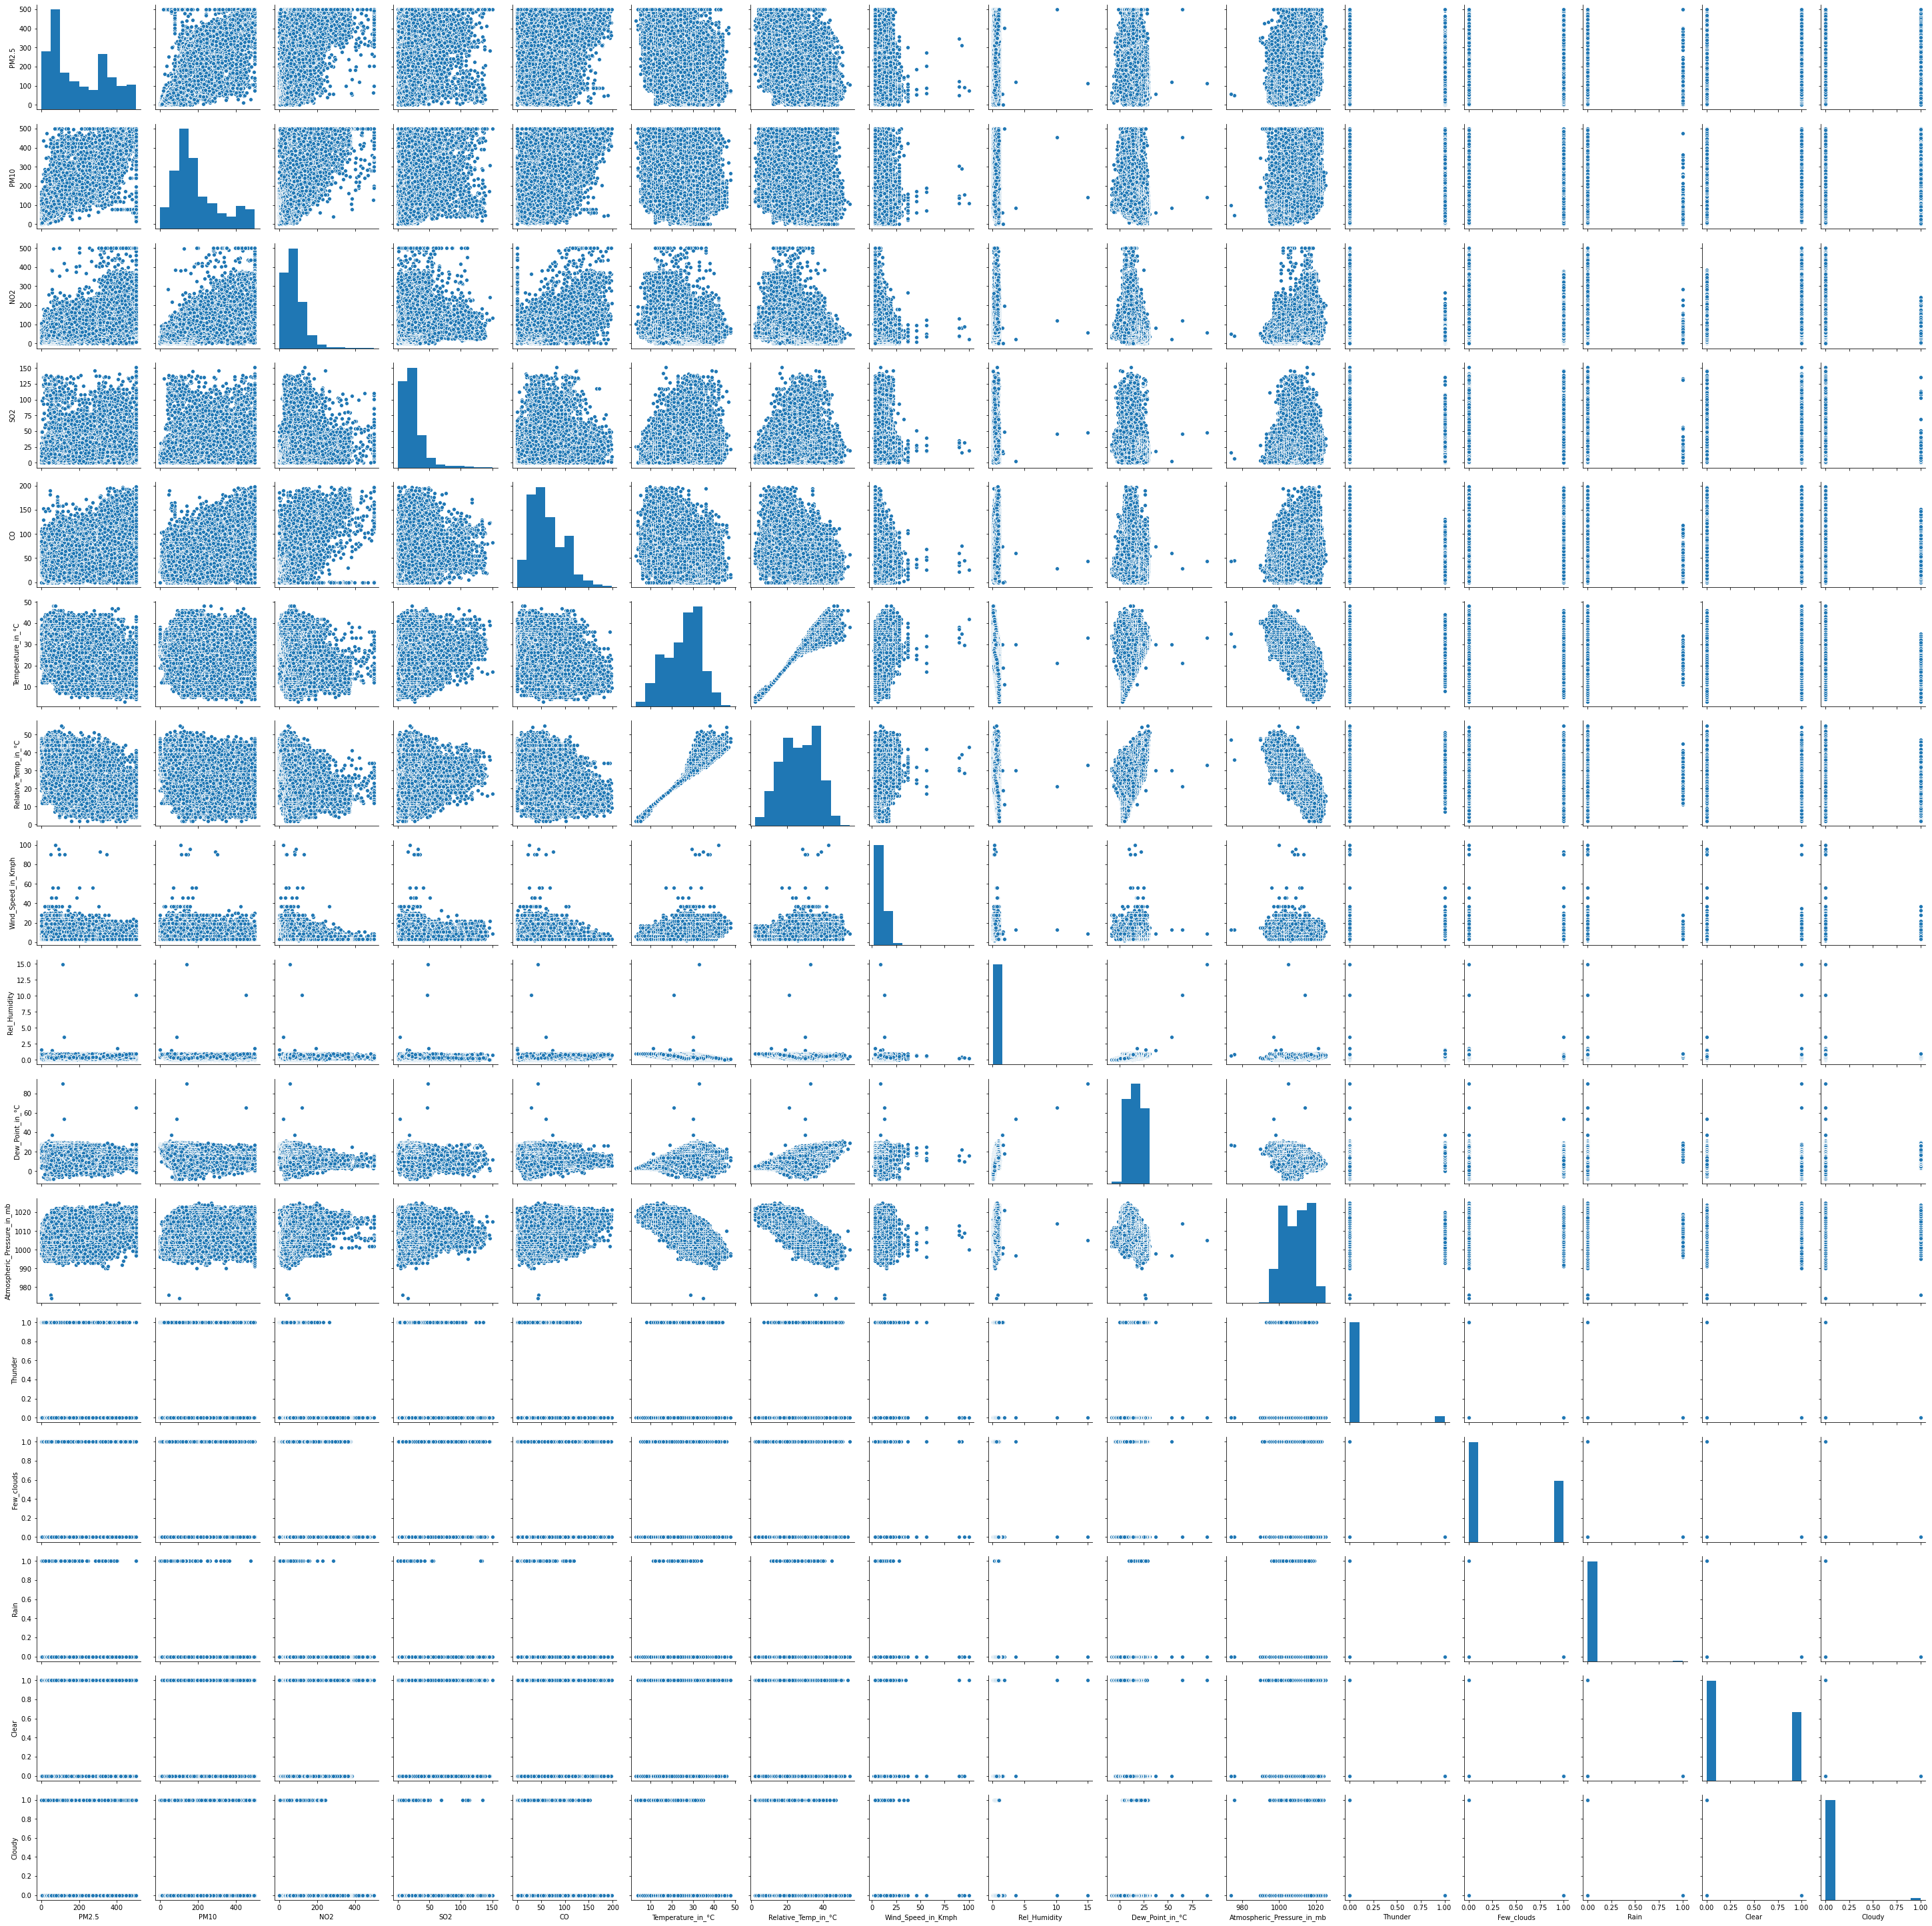

In [7]:
# Scatter Plot between each features
sns.pairplot(aqi_df)

plt.show()

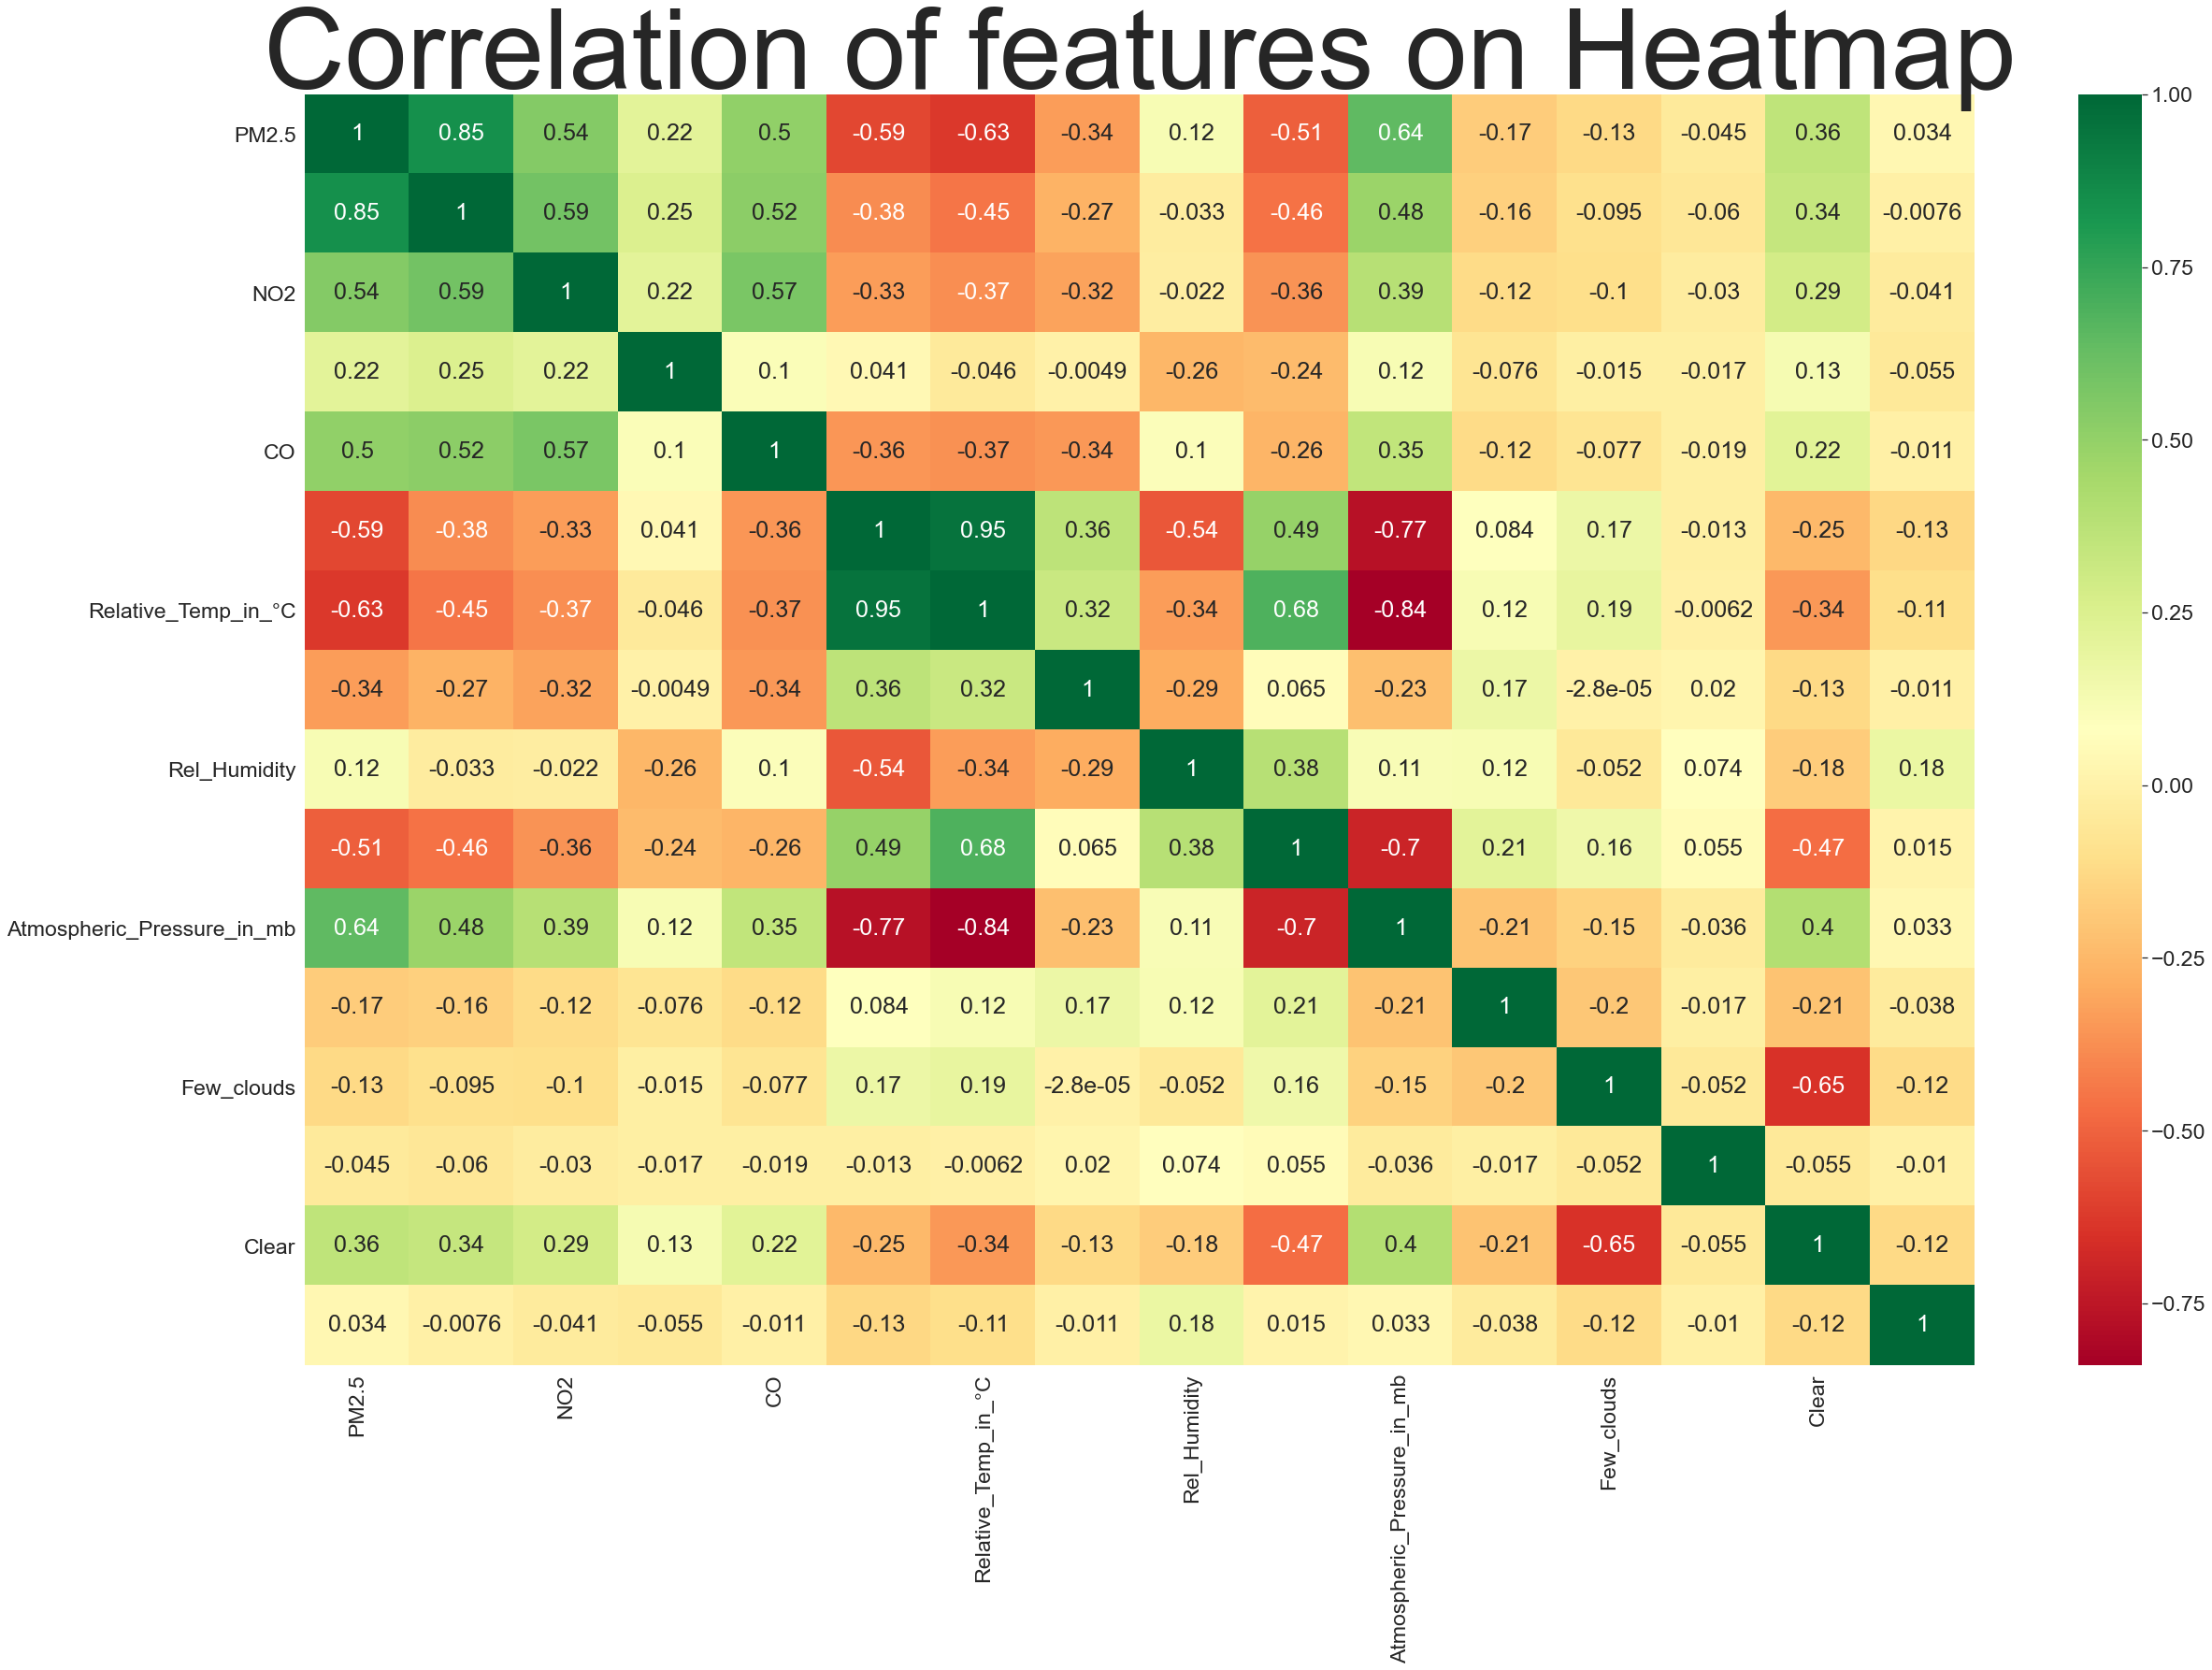

In [9]:
# Correlation Heat Map
sns.heatmap(aqi_df.corr(), annot = True, cmap = 'RdYlGn')
plt.title("Correlation of features on Heatmap", fontsize = 120)
sns. set(font_scale=2.1)
fig = plt.gcf()
fig.set_size_inches(40, 25)
plt.show()

In [7]:
# Checking the missing values
aqi_df.isnull().sum()

timestamp                     0
PM2.5                         0
PM10                          0
NO2                           0
SO2                           0
CO                            0
Temperature_in_°C             0
Relative_Temp_in_°C           0
Wind_Speed_in_Kmph            0
Rel_Humidity                  0
Dew_Point_in_°C               0
Atmospheric_Pressure_in_mb    0
Thunder                       0
Few_clouds                    0
Rain                          0
Clear                         0
Cloudy                        0
dtype: int64

### Feature Importance

In [10]:
X = aqi_df[['PM10', 'NO2', 'SO2', 'CO', 'Temperature_in_°C', 'Relative_Temp_in_°C', 'Wind_Speed_in_Kmph', 'Rel_Humidity', 'Dew_Point_in_°C', 'Atmospheric_Pressure_in_mb', 'Thunder', 'Few_clouds', 'Rain', 'Clear', 'Cloudy']]
y = aqi_df['PM2.5']

In [11]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [14]:
print(X.columns)
print(model.feature_importances_)

Index(['PM10', 'NO2', 'SO2', 'CO', 'Temperature_in_°C', 'Relative_Temp_in_°C',
       'Wind_Speed_in_Kmph', 'Rel_Humidity', 'Dew_Point_in_°C',
       'Atmospheric_Pressure_in_mb', 'Thunder', 'Few_clouds', 'Rain', 'Clear',
       'Cloudy'],
      dtype='object')
[6.14691885e-01 2.37605482e-02 1.69096421e-02 2.24789007e-02
 7.20907567e-02 9.67509749e-02 1.51435032e-02 1.73827901e-02
 1.35663631e-02 9.12913946e-02 3.03703947e-03 4.48697555e-03
 1.84717647e-04 7.53743160e-03 6.87076586e-04]


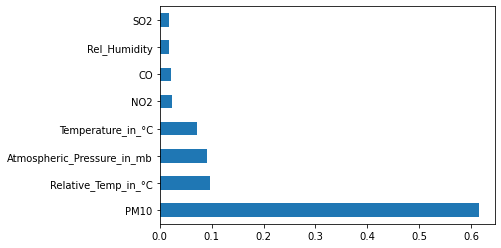

In [16]:
# Ploting the feature importance scores on Graph using ExtraTreesRegressor
f_imp = pd.Series(model.feature_importances_, index = X.columns)
f_imp.nlargest(8).plot(kind = 'barh')
plt.show()

### Univariate Analysis

#### PM2.5

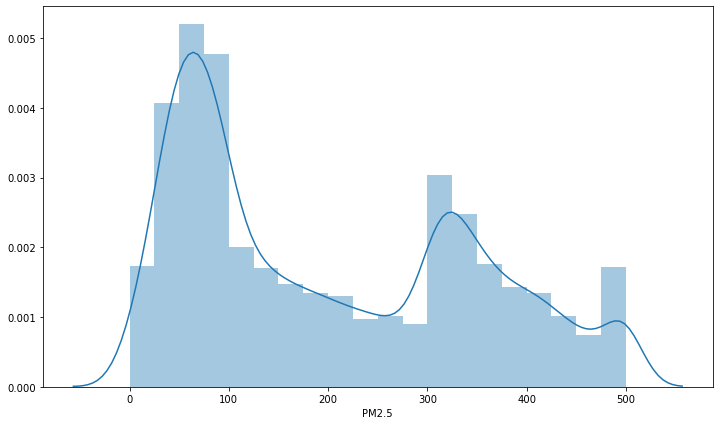

In [31]:
# PM2.5 Distribution
fig, ax = plt.subplots(figsize =(12, 7))
sns.distplot(aqi_df['PM2.5'], bins = 20)
plt.show()

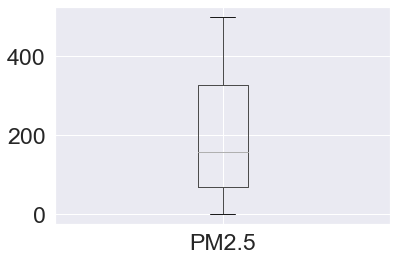

In [21]:
aqi_df.boxplot(column = ['PM2.5'])

In [20]:
aqi_df['PM2.5'].describe()

count    38231.000000
mean       200.981638
std        146.936040
min          0.000000
25%         69.000000
50%        157.000000
75%        328.000000
max        500.000000
Name: PM2.5, dtype: float64

In [30]:
pm25_monthly = aqi_df.groupby([aqi_df.timestamp.dt.strftime('%b %Y')])['PM2.5'].mean().reset_index(name='PM2.5 Monthly Average')

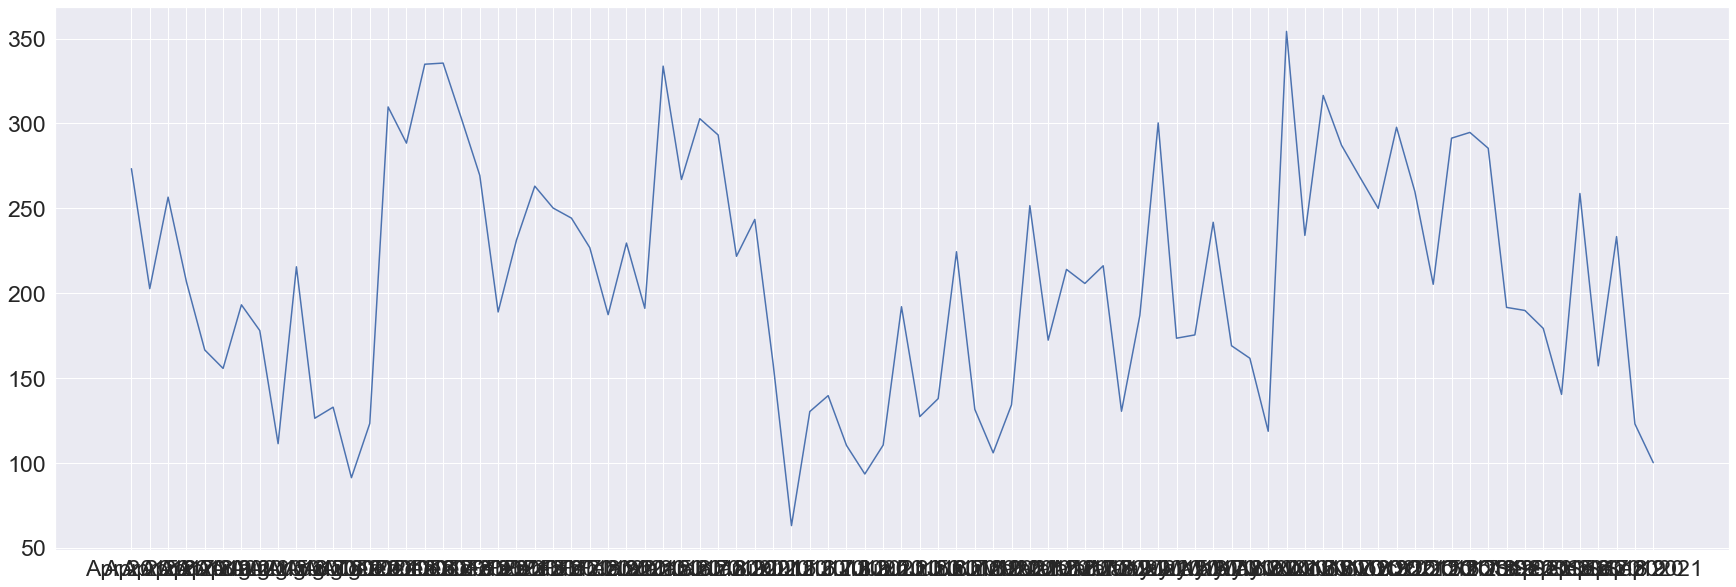

In [31]:
# PM2.5 Monthly Average Line Chart
fig, ax = plt.subplots(figsize =(30, 10))
plt.plot(pm25_monthly['timestamp'], pm25_monthly['PM2.5 Monthly Average'])  
plt.show()

#### PM10

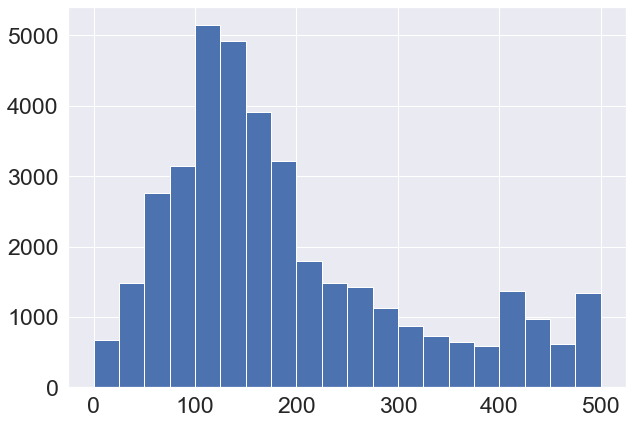

In [22]:
# PM10 Distribution
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(aqi_df['PM10'], bins = 20)
plt.show()

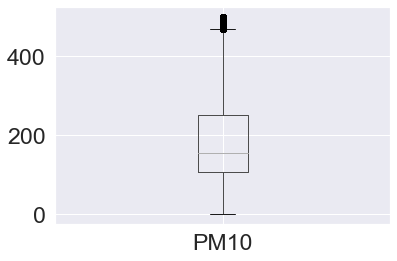

In [25]:
aqi_df.boxplot(column = ['PM10'])

In [23]:
aqi_df['PM10'].describe()

count    38231.000000
mean       192.125696
std        122.500828
min          0.000000
25%        107.000000
50%        156.000000
75%        252.000000
max        500.000000
Name: PM10, dtype: float64

In [26]:
pm10_monthly = aqi_df.groupby([aqi_df.timestamp.dt.strftime('%b %Y')])['PM10'].mean().reset_index(name='PM10 Monthly Average')

In [27]:
pm10_monthly.head(3)

timestamp  PM10 Monthly Average
0  Apr 2015            247.408696
1  Apr 2016            243.150022
2  Apr 2017            251.495413

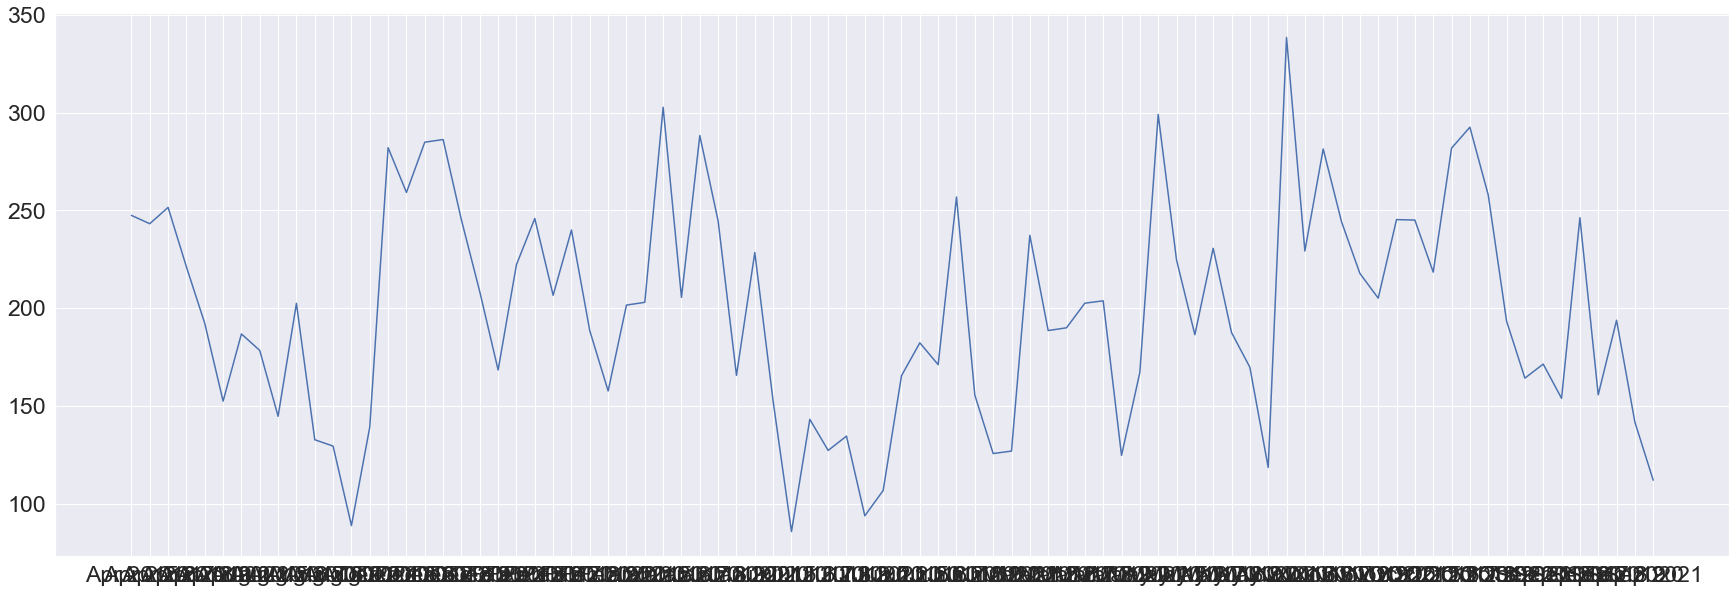

In [28]:
# PM10 Monthly Average Line Chart
fig, ax = plt.subplots(figsize =(30, 10))
plt.plot(pm10_monthly['timestamp'], pm10_monthly['PM10 Monthly Average'])  
plt.show()

#### NO2

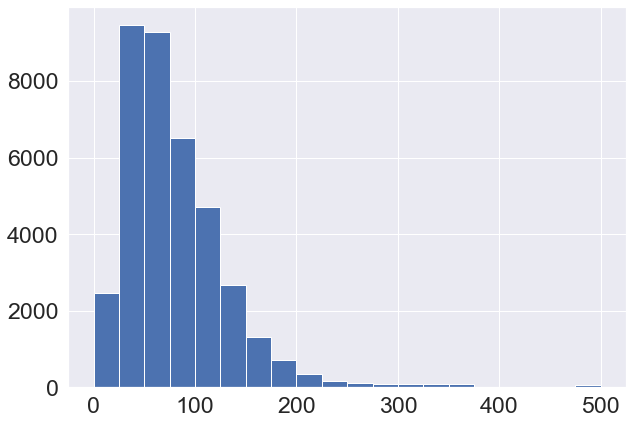

In [35]:
# NO2 Distribution
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(aqi_df['NO2'], bins = 20)
plt.show()

In [36]:
print("NO2 Mean:", str(aqi_df['NO2'].mean()), " ; ","NO2 Median:", str(aqi_df['NO2'].median()), " ; ","NO2 Std.dev:", str(aqi_df['NO2'].std()))

NO2 Mean: 80.00911156557876  ;  NO2 Median: 68.0  ;  NO2 Std.dev: 54.195881764201815


In [37]:
no2_monthly = aqi_df.groupby([aqi_df.timestamp.dt.strftime('%b %Y')])['NO2'].mean().reset_index(name='NO2 Monthly Average')

In [38]:
no2_monthly.head(3)

timestamp  NO2 Monthly Average
0  Apr 2015            85.086957
1  Apr 2016           102.625653
2  Apr 2017           173.694381

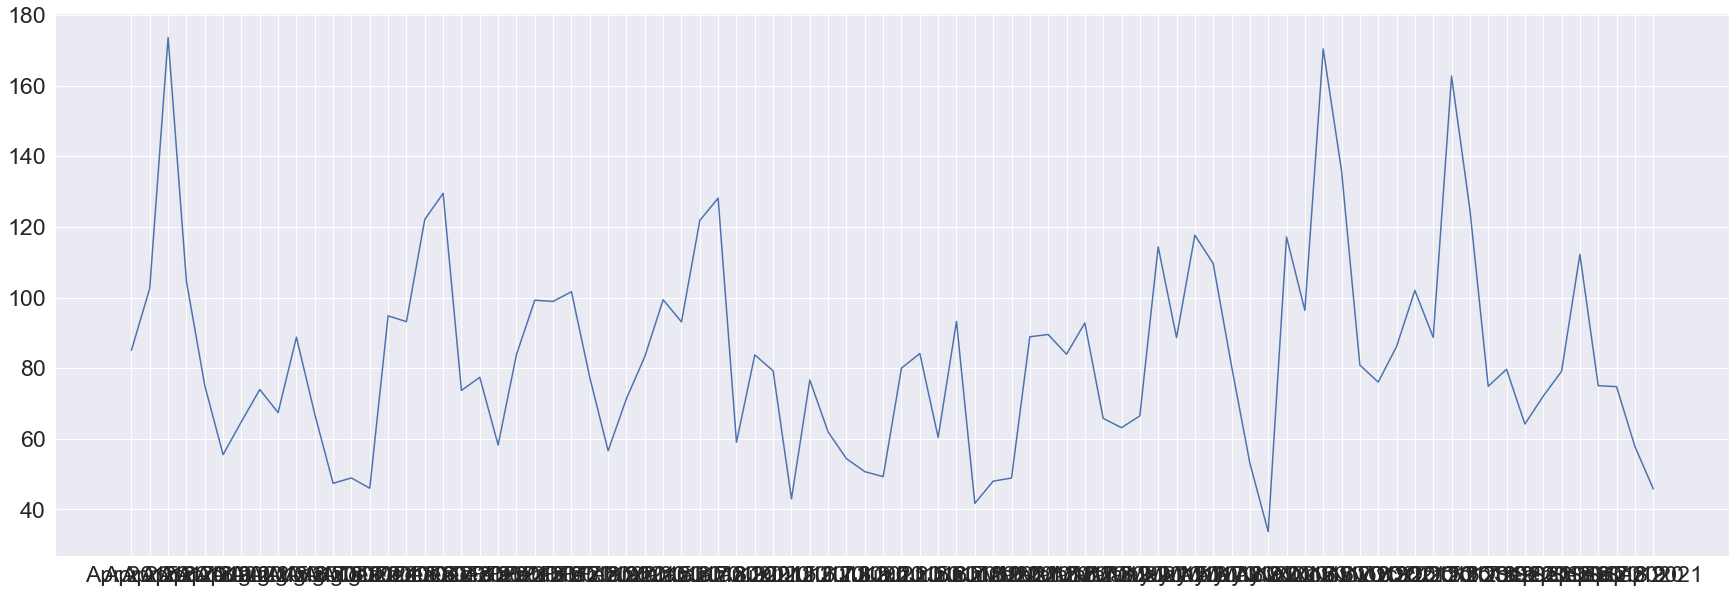

In [39]:
# NO2 Monthly Average Line Chart
fig, ax = plt.subplots(figsize =(30, 10))
plt.plot(no2_monthly['timestamp'], no2_monthly['NO2 Monthly Average'])  
plt.show()

#### SO2

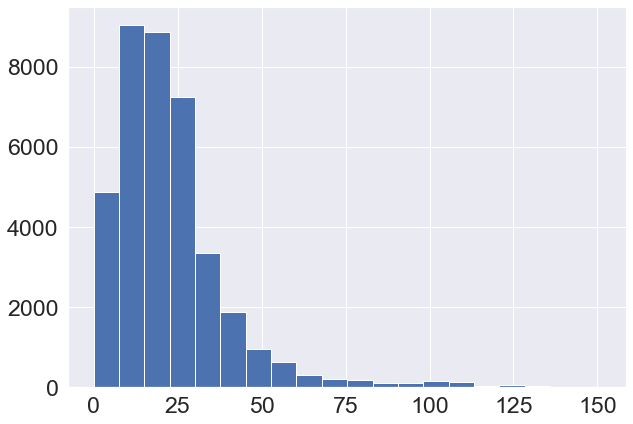

In [40]:
# SO2 Distribution
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(aqi_df['SO2'], bins = 20)
plt.show()

In [41]:
print("SO2 Mean:", str(aqi_df['SO2'].mean()), " ; ","SO2 Median:", str(aqi_df['SO2'].median()), " ; ","SO2 Std.dev:", str(aqi_df['SO2'].std()))

SO2 Mean: 22.838967633346833  ;  SO2 Median: 19.0  ;  SO2 Std.dev: 17.387541757213675


#### CO

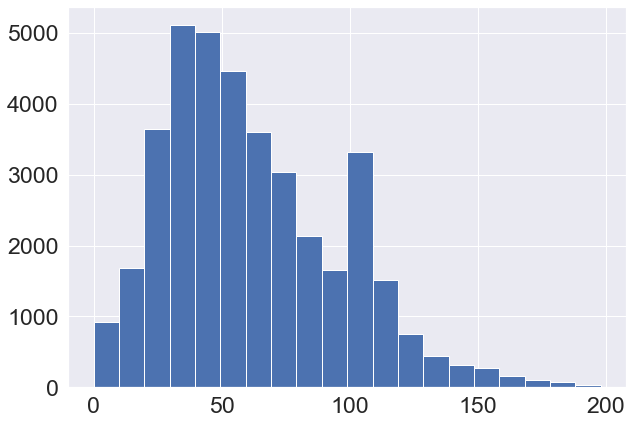

In [42]:
# CO Distribution
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(aqi_df['CO'], bins = 20)
plt.show()

In [43]:
print("CO Mean:", str(aqi_df['CO'].mean()), " ; ","CO Median:", str(aqi_df['CO'].median()), " ; ","CO Std.dev:", str(aqi_df['CO'].std()))

CO Mean: 61.591196543954204  ;  CO Median: 55.0  ;  CO Std.dev: 34.24288929984572


#### Temperature_in_°C

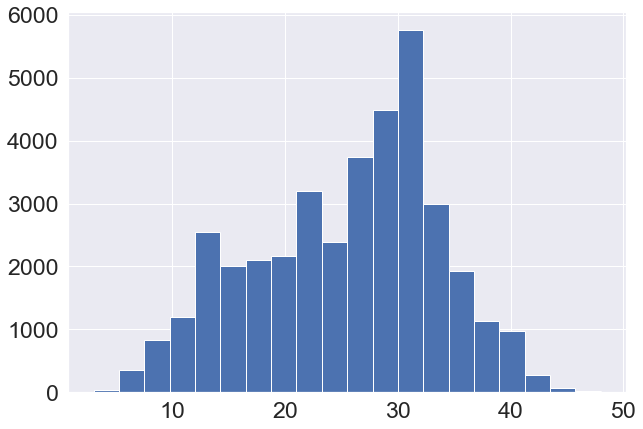

In [67]:
# Temperature_in_°C Distribution
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(aqi_df['Temperature_in_°C'], bins = 20)
plt.show()

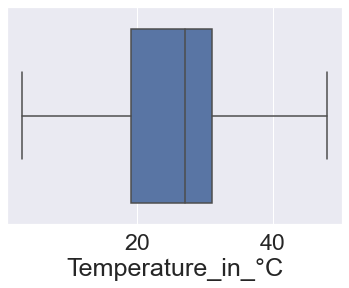

In [68]:
sns.boxplot(aqi_df['Temperature_in_°C'])

In [55]:
print(np.where(aqi_df['Temperature_in_°C']>50))

(array([18221], dtype=int64),)


In [56]:
aqi_df['Temperature_in_°C'][18221]

72.0

In [57]:
aqi_df['Temperature_in_°C'][18218:18225]

18218    19.0
18219    21.0
18220    23.0
18221    72.0
18222    29.0
18223    30.0
18224    31.0
Name: Temperature_in_°C, dtype: float64

In [58]:
aqi_df['Temperature_in_°C'][18221] = 27

<ipython-input-58-fd76711bed18>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aqi_df['Temperature_in_°C'][18221] = 27


In [59]:
aqi_df['Temperature_in_°C'][18218:18225]

18218    19.0
18219    21.0
18220    23.0
18221    27.0
18222    29.0
18223    30.0
18224    31.0
Name: Temperature_in_°C, dtype: float64

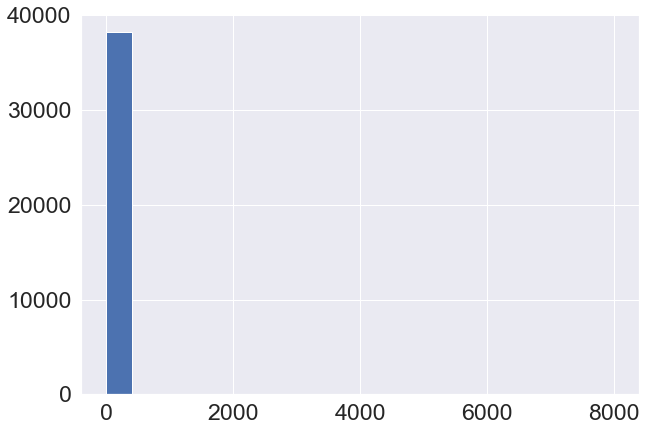

In [66]:
# Relative_Temp_in_°C Distribution
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(aqi_df['Relative_Temp_in_°C'], bins = 20)
plt.show()

### Checking Outliers

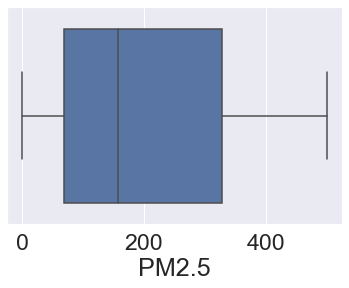

In [54]:
sns.boxplot(aqi_df['PM2.5'])

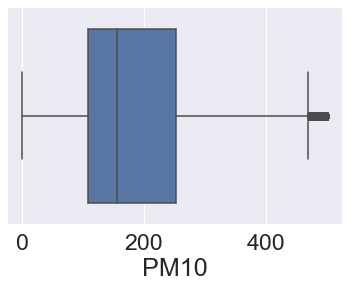

In [35]:
sns.boxplot(aqi_df['PM10'])

In [46]:
print(np.where(aqi_df['PM10']>450))

(array([    4,   118,   195, ..., 38212, 38213, 38214], dtype=int64),)


In [63]:
aqi_df['PM10'][38214]

459.0

In [65]:
print(np.where(aqi_df['PM10']>500))

(array([], dtype=int64),)


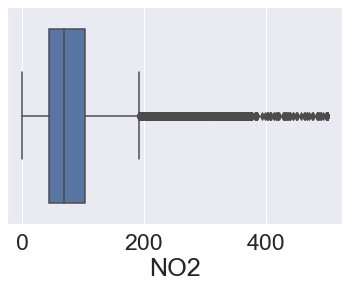

In [47]:
sns.boxplot(aqi_df['NO2'])

In [49]:
print(np.where(aqi_df['NO2']>450))

(array([12164, 12165, 12166, 12167, 12168, 12169, 12170, 12171, 12187,
       12188, 12189, 12190, 12191, 12192, 12193, 12194, 12195, 12196,
       12197, 12198, 12234, 12235, 12236, 13414, 13415, 13422, 13597,
       13598, 13619, 13620, 13688, 13689, 13740, 13741, 13742, 13743,
       13744, 13993, 13994, 13995, 13996, 13997, 14017, 14018, 14019,
       14020, 14021, 14032, 14033, 14034, 14035, 14036, 14055, 14056,
       14057, 14058, 14059, 14060, 14061, 14062, 14066, 14067],
      dtype=int64),)
